# Virtual Binary Gates

Virtual binary gates are the core of QVM. They implement the virtualization of binary gates by sampling multiple configurations of **single-qubit** gates as explained in "Constructing a virtual two-qubit gate by sampling single-qubit operations" (Kosuke Mitarai and Fujii Keisuke).

As an example, the following image schematically shows how to virtualize a CZ gate:

![formula1](./img/formula.png)


Every virtual gate is a subclass of the abstract `qvm.virtual_gate.VirtualBinaryGate` class. 
Therefore, every virtual gate needs to implement the 2 methods `configure()` and `knit()` as shown below.


In [1]:
from typing import List
from qiskit import QuantumCircuit
from qvm.virtual_gate import VirtualBinaryGate
from qvm.prob import ProbDistribution


class SomeVirtualGate(VirtualBinaryGate):
    # configure returns a list of circuits that need to be inserted instead of the binary gate
    # every configuration circuit must be a QuantumCircuit with 2 qubits and 1 clbit, only 
    # containing single-qubit instructions
    def configure(self) -> List[QuantumCircuit]:
        pass

    # knit the result by using the results of the circuits that had the configurations of 
    # configure() inserted
    def knit(self, results: List[ProbDistribution]) -> ProbDistribution:
        pass


Virtual gates can be simply appended to `QuantumCircuit`s, just like any other instruction. QVM implements the 3 standard virtual gates `VirtualCX`, `VirtualCZ` and `VirtualRZZ`.

**NOTE**: The `VirtualBinaryGate` class itself is a subclass of `qiskit.circuit.Barrier`, and is therefore also represented as a barrier when drawing a circuit.


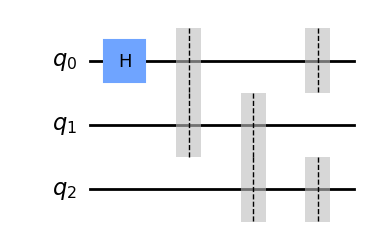

In [2]:
from qvm.virtual_gate import VirtualCX, VirtualCZ, VirtualRZZ

circuit = QuantumCircuit(3)
circuit.h(0)
circuit.append(VirtualCX(), [0, 1], [])
circuit.append(VirtualCZ(), [1, 2], [])
circuit.append(VirtualRZZ(params=[0.5,]), [0, 2], [])
circuit.draw('mpl')

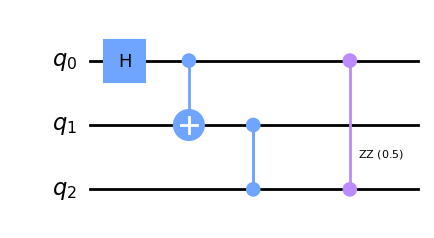

In [3]:
normal_circuit = circuit.decompose([VirtualBinaryGate])
normal_circuit.draw('mpl')


## Transpiling a Circuit with Virtual Gates

Since virtual gates are subclasses of `Barrier`, any existing transpiler and optimizer on `QuantumCircuit`s work as intended without needing any change. 

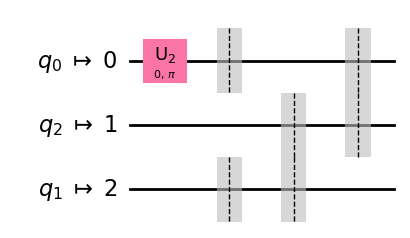

In [4]:
from qiskit import transpile

t_circ = transpile(circuit, initial_layout=[0, 2, 1], optimization_level=3, basis_gates=['u1', 'u2', 'u3', 'cx'])
t_circ.draw('mpl')

If you want to revert the virtualization, you can simply decompose the virtual gates:

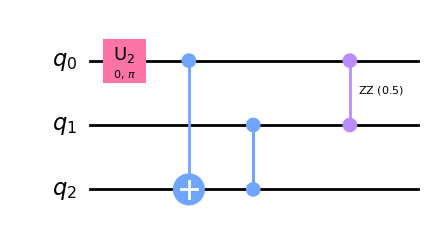

In [5]:
t_circ.decompose([VirtualBinaryGate]).draw('mpl')